In [1]:
import time
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

In [2]:
# Load the KDD99 dataset into a pandas dataframe
df = pd.read_csv('../Preprocess/finalInt.csv')

# Split the data into features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
start_time = time.time()
RandomForest = RandomForestClassifier(n_estimators=100)
RandomForest.fit(X_train, y_train)
end_time = time.time()

Train_Time = end_time - start_time

# Make predictions on the test set
y_pred = RandomForest.predict(X_test)

# Evaluate the accuracy of the classifier
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", Accuracy)
print("Training time: ",Train_Time)

Accuracy:  0.9999908133924407
Training time:  491.29939103126526


ValueError: The number of FixedLocator locations (32), usually from a call to set_ticks, does not match the number of ticklabels (41).

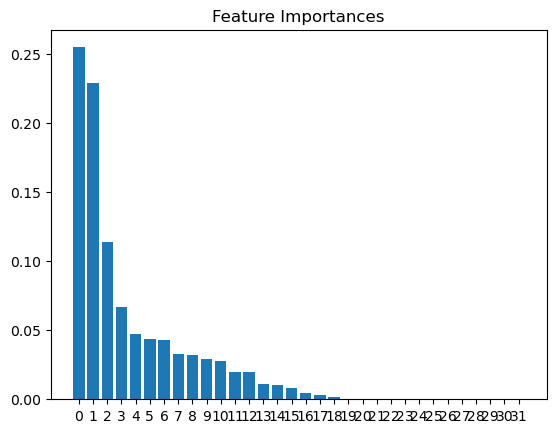

In [6]:
import matplotlib.pyplot as plt

importances = RandomForest.feature_importances_
feature_names = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',"srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
"dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]

# Sort the feature importance scores in descending order
indices = importances.argsort()[::-1]

# Create a bar plot of the feature importance scores
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.show()

In [3]:
pickle.dump(RandomForest, open("../ML/RandomForest.pkl", "wb"))